In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Datasets/economic_index_Multiple_LR_In_Action.csv")
df.head(), df.shape

(   Unnamed: 0  year  month  interest_rate  unemployment_rate  index_price
 0           0  2017     12           2.75                5.3         1464
 1           1  2017     11           2.50                5.3         1394
 2           2  2017     10           2.50                5.3         1357
 3           3  2017      9           2.50                5.3         1293
 4           4  2017      8           2.50                5.4         1256,
 (24, 6))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [4]:
df.describe()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
count,24.000000,24.000000,24.000000,24.000000,24.00000,24.000000
mean,11.500000,2016.500000,6.500000,2.072917,5.77500,1070.083333
std,7.071068,0.510754,3.526299,0.349527,0.33002,210.735341
min,0.000000,2016.000000,1.000000,1.750000,5.30000,704.000000
25%,5.750000,2016.000000,3.750000,1.750000,5.50000,928.250000
50%,11.500000,2016.500000,6.500000,2.000000,5.85000,1061.000000
75%,17.250000,2017.000000,9.250000,2.500000,6.10000,1239.000000
max,23.000000,2017.000000,12.000000,2.750000,6.20000,1464.000000


In [5]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [6]:
# Dropping unnecessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 704.0 bytes


In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

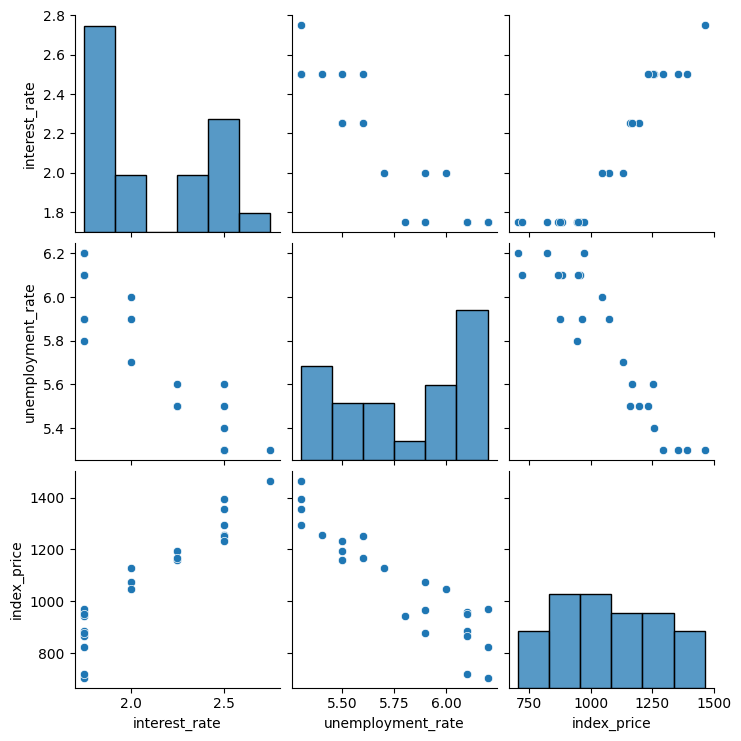

In [10]:
sns.pairplot(df)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

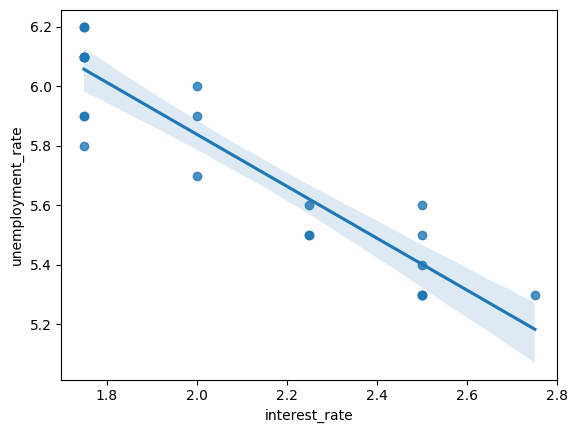

In [11]:
sns.regplot(x=df.interest_rate, y=df.unemployment_rate)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

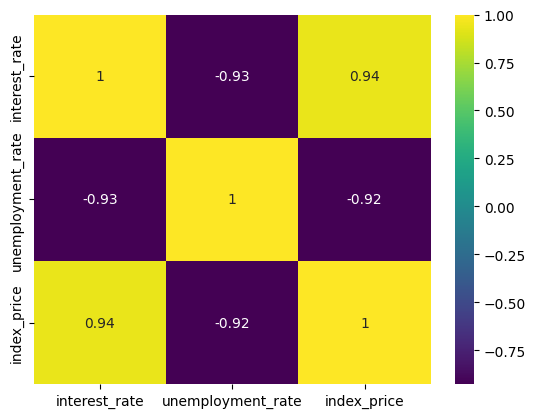

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [14]:
# Independent and Dependent Features
# X = df[['interest_rate', 'unemployment_rate']]
# X = df[[df.interest_rate.name, df.unemployment_rate.name]]
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [15]:
X.head(), y.head()

(   interest_rate  unemployment_rate
 0           2.75                5.3
 1           2.50                5.3
 2           2.50                5.3
 3           2.50                5.3
 4           2.50                5.4,
 0    1464
 1    1394
 2    1357
 3    1293
 4    1256
 Name: index_price, dtype: int64)

Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18, 2), (6, 2), (18,), (6,))

Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train, X_test

(array([[-0.90115511,  0.37908503],
        [ 1.31077107, -1.48187786],
        [-0.90115511,  1.30956648],
        [ 1.31077107, -0.55139641],
        [ 1.31077107, -1.48187786],
        [-0.16384638,  0.68924552],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -1.48187786],
        [ 1.31077107, -1.17171738],
        [-0.90115511,  1.30956648],
        [-0.90115511,  0.999406  ],
        [-0.90115511,  0.37908503],
        [-0.90115511,  0.999406  ],
        [ 0.57346234, -0.8615569 ],
        [-0.16384638, -0.24123593],
        [-0.90115511,  0.06892455],
        [-0.90115511,  0.999406  ],
        [ 1.31077107, -0.8615569 ]]),
 array([[ 0.36115756, -0.82078268],
        [-1.08347268,  1.33377186],
        [ 1.8057878 , -1.43636969],
        [-1.08347268,  1.02597835],
        [-0.36115756,  0.41039134],
        [ 0.36115756, -0.51298918]]))

Applying Multiple Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [19]:
mlr.coef_, mlr.intercept_

(array([  88.27275507, -116.25716066]), 1053.4444444444443)

Cross Validation

![Screenshot From 2025-08-14 11-53-44.png](</home/mrx/Documents/Code/Machine_Learning_Universe/Supervised_Learning/Datasets/Screenshot From 2025-08-14 11-53-44.png>)

In [20]:
# Cross Validation
from sklearn.model_selection import cross_val_score

validation_score = cross_val_score(mlr, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [21]:
np.mean(validation_score)

-5914.828180162388

Prediction

In [22]:
y_pred = mlr.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_pred)
adjusted_r2score = 1 - (1 - r2score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

mae, mse, rmse, r2score, adjusted_r2score

(73.80444932337097,
 8108.567426306604,
 90.04758423359621,
 0.7591371539010257,
 0.5985619231683761)

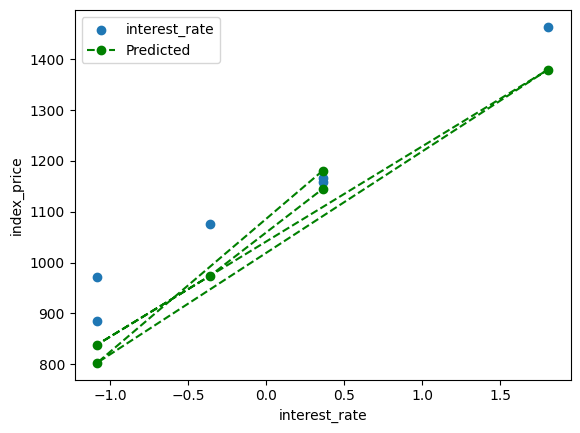

In [24]:
plt.scatter(X_test[:, 0], y_test, label="interest_rate")
plt.plot(X_test[:, 0], y_pred, marker='o', color='green', linestyle='dashed', label="Predicted")

plt.xlabel("interest_rate")
plt.ylabel("index_price")
plt.legend()
plt.show()


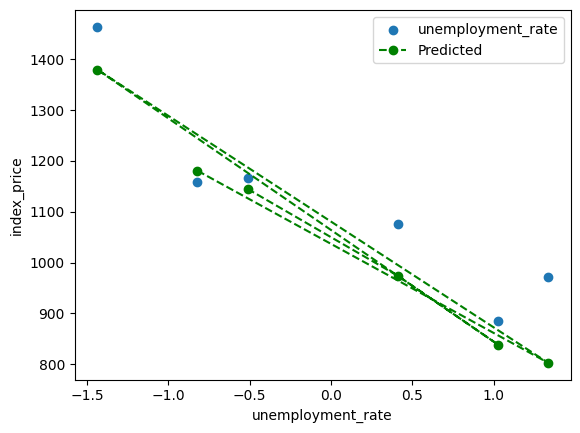

In [25]:
plt.scatter(X_test[:, 1], y_test, label="unemployment_rate")
plt.plot(X_test[:, 1], y_pred, marker='o', color='green', linestyle='dashed', label="Predicted")

plt.xlabel("unemployment_rate")
plt.ylabel("index_price")
plt.legend()
plt.show()


For multiple features, use subplots

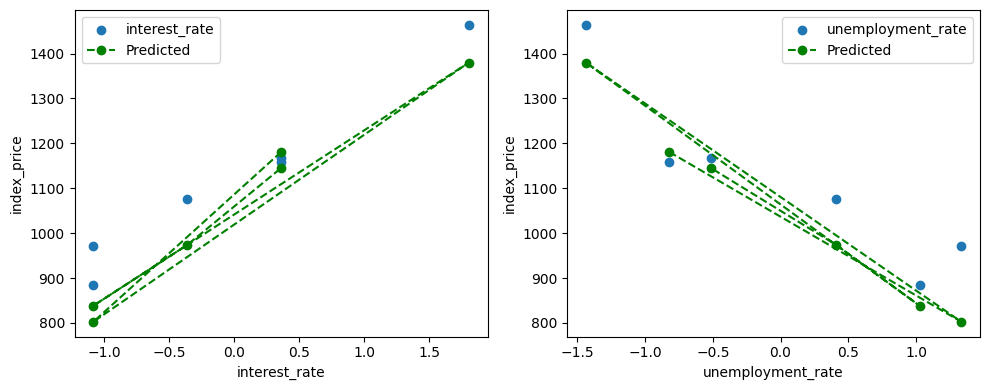

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

for i, ax in enumerate(axs):
    ax.scatter(X_test[:, i], y_test, label=df.columns[i])
    ax.plot(X_test[:, i], y_pred, marker='o', color='green', linestyle='dashed', label="Predicted")
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel(df.columns[-1])
    ax.legend()

plt.tight_layout()
plt.show()


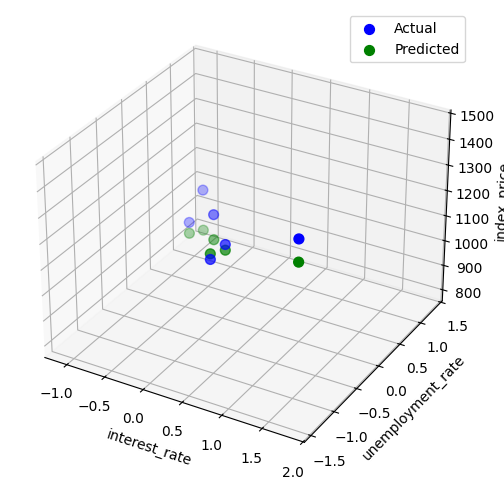

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D projection

# Create 3D axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter actual points
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', marker='o', label='Actual', s=50)

# Scatter predicted points
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='green', marker='o', label='Predicted', s=50)

# Labels
ax.set_xlabel('interest_rate')
ax.set_ylabel('unemployment_rate')
ax.set_zlabel('index_price')
ax.legend()

plt.show()


Residuals

In [28]:
residuals = y_test - y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

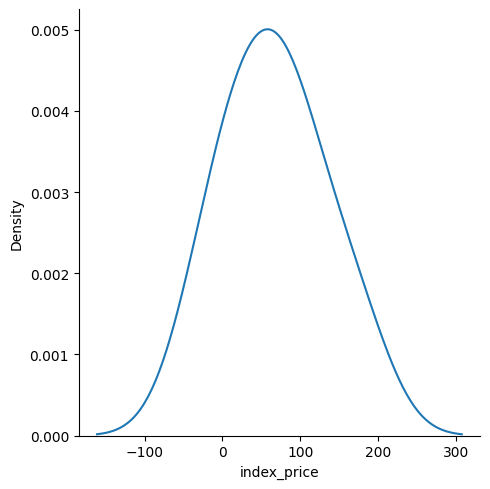

In [34]:
sns.displot(residuals, kind='kde')

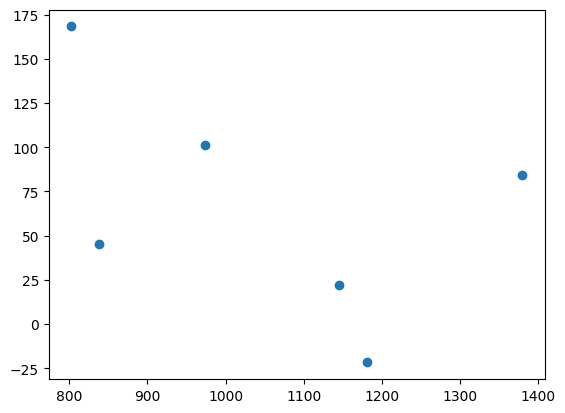

In [36]:
plt.scatter(y_pred, residuals) # Uniformly Distributed if it follows a Pattern then there is some issue in the model

In [31]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
prediction = model.predict(X_test)
prediction

array([ 127.30223686, -250.70164745,  326.390126  , -214.91844842,
        -79.59130481,   91.51903783])

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 15 Aug 2025   Prob (F-statistic):                       0.754
Time:                        19:00:24   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""